In [1]:
import pandas as pd

In [194]:
cycles = pd.read_pickle('AllClinics_MoreBloods_270524.pkl')
# List of columns you want to keep
columns_to_keep = [
    "Clinic",
    "PatientIdentifier",
    "Cycle Number",
    "Treatment Start Date",
    "Age at Egg Collection",
    "BMI",
    "Weight_kg",
    "Height_cm",
    "Ethnicity",
    "Infertility Diagnosis",
    "Treatment Name",
    "Trigger Date",
    "Egg Collection Date",
    "No. Eggs Collected",
    "No. Mature Eggs",
    "No. 2PNs",
    "No. Suitable Blastocysts",
    "No. Embryos Transferred",
    "Transfer Date",
    "Pregnancy Outcome",
    "Pregnancy Achieved?",
    "AFC_result",
    "amh_value",
    "protocol_map",
    "median_size",
    "mean_size",
    "mean_vol_size",
    "13_18mm",
    "Infertility Diagnosis Type",
    "Ethnicity Category",
    "Ethnicity Subcategory",
    'Downreg Drug Detail',
    'os_init_dose'
]

# Selecting only the specified columns from the dataframe
filtered_cycles = cycles[columns_to_keep]


In [2]:
data = pd.read_pickle('Filtered_AllClinics_Updated_29052024.pkl')
# data['Clinic'].unique()

In [3]:
# data = pd.read_pickle('Filtered_AllClinics_27052024.pkl')
# data['Clinic'].unique()

In [4]:
data.drop('Treatment Start Date', axis=1)

,Clinic,PatientIdentifier,Cycle Number,Age at Egg Collection,BMI,Weight_kg,Height_cm,Ethnicity,Infertility Diagnosis,Treatment Name,...,protocol_map,median_size,mean_size,mean_vol_size,13_18mm,Infertility Diagnosis Type,Ethnicity Category,Ethnicity Subcategory,Downreg Drug Detail,os_init_dose
0,WFC,76786,TX97,20.0,-1.00,-1.0,NaN,Arab,pco,IVF,...,SHORT,-1.0,-1.0,-1.0,-1,Ovulatory,Other,Middle Eastern,"[[Ganirelix, 2010-11-21 00:00:00, mcg, 250.0],...",300.0
1,WFC,76786,TX18648,21.0,-1.00,-1.0,NaN,Arab,anovulation,IVF,...,NONE,-1.0,-1.0,-1.0,-1,Ovulatory,Other,Middle Eastern,NaN,NaN
2,WFC,76786,TX3,20.0,-1.00,-1.0,NaN,Arab,pco,IVF,...,LONG,-1.0,-1.0,-1.0,-1,Ovulatory,Other,Middle Eastern,"[[Buserelin injection, NaT, mcg, 500.0], [Buse...",300.0
3,WFC,76786,TX38406,30.0,-1.00,-1.0,NaN,Arab,nan,ICSI,...,NONE,-1.0,-1.0,-1.0,-1,Unexplained,Other,Middle Eastern,NaN,NaN
4,WFC,76786,TX7,20.0,-1.00,-1.0,NaN,Arab,pco,ICSI,...,NONE,13.0,13.9,1440.5,29,Ovulatory,Other,Middle Eastern,NaN,225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108762,BELF,GCRMB-112474,GCRMB-293052,44.7,27.82,73.0,162.0,-,-,Fresh treatment,...,LONG,-1.0,-1.0,-1.0,-1,Unexplained,Unknown,Unknown,NaN,NaN
108763,THVF,TVF-139971,TVF-308437,38.0,-1.00,-1.0,-1.0,-,-,Fresh Treatment,...,SHORT,-1.0,-1.0,-1.0,-1,Unexplained,Unknown,Unknown,NaN,NaN
108764,OXFD,OF-171591,OF-220895,31.2,-1.00,-1.0,-1.0,-,-,Fresh treatment,...,SHORT,-1.0,-1.0,-1.0,-1,Unexplained,Unknown,Unknown,NaN,NaN
108765,CMM,CMM-101869,CMM-18882,38.0,-1.00,-1.0,-1.0,-,Zachowanie plodnosci,Mrozenie oocytów,...,SHORT,-1.0,-1.0,-1.0,-1,Cancer,Unknown,Unknown,NaN,300.0


In [5]:
# one hot encode the infertility diagnosis and ethnicity category
data['Infertility Diagnosis Type'] = data['Infertility Diagnosis Type'].replace('Uterine, Cervical and Pelvic', 'Uterine, Cervical or Pelvic')
data['Infertility Diagnosis Type']

0           Ovulatory
1           Ovulatory
2           Ovulatory
3         Unexplained
4           Ovulatory
             ...     
108762    Unexplained
108763    Unexplained
108764    Unexplained
108765         Cancer
108766    Unexplained
Name: Infertility Diagnosis Type, Length: 108767, dtype: object

### One-Hot Encoding Infertility Diagnosis

In [78]:
df_encoded = pd.get_dummies(data, columns=['Infertility Diagnosis Type'], prefix=['Diag'])

# Print the DataFrame after one-hot encoding
print("\nDataFrame after One-Hot Encoding:")
print(df_encoded['Diag_Cancer'])


DataFrame after One-Hot Encoding:
0         False
1         False
2         False
3         False
4         False
          ...  
108762    False
108763    False
108764    False
108765     True
108766    False
Name: Diag_Cancer, Length: 108767, dtype: bool


In [7]:
df_encoded

,Clinic,PatientIdentifier,Cycle Number,Treatment Start Date,Age at Egg Collection,BMI,Weight_kg,Height_cm,Ethnicity,Infertility Diagnosis,...,Diag_Cancer,Diag_Endocrine,Diag_Genetic,Diag_Male Factor,Diag_Other,Diag_Ovarian,Diag_Ovulatory,Diag_Tubal,Diag_Unexplained,"Diag_Uterine, Cervical or Pelvic"
0,WFC,76786,TX97,2010-11-17,20.0,-1.00,-1.0,NaN,Arab,pco,...,False,False,False,False,False,False,True,False,False,False
1,WFC,76786,TX18648,2011-03-23,21.0,-1.00,-1.0,NaN,Arab,anovulation,...,False,False,False,False,False,False,True,False,False,False
2,WFC,76786,TX3,2010-04-15,20.0,-1.00,-1.0,NaN,Arab,pco,...,False,False,False,False,False,False,True,False,False,False
3,WFC,76786,TX38406,2021-01-01,30.0,-1.00,-1.0,NaN,Arab,nan,...,False,False,False,False,False,False,False,False,True,False
4,WFC,76786,TX7,2010-06-11,20.0,-1.00,-1.0,NaN,Arab,pco,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108762,BELF,GCRMB-112474,GCRMB-293052,2023-10-11,44.7,27.82,73.0,162.0,-,-,...,False,False,False,False,False,False,False,False,True,False
108763,THVF,TVF-139971,TVF-308437,2023-10-12,38.0,-1.00,-1.0,-1.0,-,-,...,False,False,False,False,False,False,False,False,True,False
108764,OXFD,OF-171591,OF-220895,2023-10-15,31.2,-1.00,-1.0,-1.0,-,-,...,False,False,False,False,False,False,False,False,True,False
108765,CMM,CMM-101869,CMM-18882,2023-10-18,38.0,-1.00,-1.0,-1.0,-,Zachowanie plodnosci,...,True,False,False,False,False,False,False,False,False,False


In [8]:
df_encoded = pd.get_dummies(df_encoded, columns=['Ethnicity Category'], prefix='Eth', dtype=float)
df_encoded

,Clinic,PatientIdentifier,Cycle Number,Treatment Start Date,Age at Egg Collection,BMI,Weight_kg,Height_cm,Ethnicity,Infertility Diagnosis,...,Diag_Ovulatory,Diag_Tubal,Diag_Unexplained,"Diag_Uterine, Cervical or Pelvic",Eth_Asian,Eth_Black,Eth_Mixed,Eth_Other,Eth_Unknown,Eth_White
0,WFC,76786,TX97,2010-11-17,20.0,-1.00,-1.0,NaN,Arab,pco,...,True,False,False,False,0.0,0.0,0.0,1.0,0.0,0.0
1,WFC,76786,TX18648,2011-03-23,21.0,-1.00,-1.0,NaN,Arab,anovulation,...,True,False,False,False,0.0,0.0,0.0,1.0,0.0,0.0
2,WFC,76786,TX3,2010-04-15,20.0,-1.00,-1.0,NaN,Arab,pco,...,True,False,False,False,0.0,0.0,0.0,1.0,0.0,0.0
3,WFC,76786,TX38406,2021-01-01,30.0,-1.00,-1.0,NaN,Arab,nan,...,False,False,True,False,0.0,0.0,0.0,1.0,0.0,0.0
4,WFC,76786,TX7,2010-06-11,20.0,-1.00,-1.0,NaN,Arab,pco,...,True,False,False,False,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108762,BELF,GCRMB-112474,GCRMB-293052,2023-10-11,44.7,27.82,73.0,162.0,-,-,...,False,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0
108763,THVF,TVF-139971,TVF-308437,2023-10-12,38.0,-1.00,-1.0,-1.0,-,-,...,False,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0
108764,OXFD,OF-171591,OF-220895,2023-10-15,31.2,-1.00,-1.0,-1.0,-,-,...,False,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0
108765,CMM,CMM-101869,CMM-18882,2023-10-18,38.0,-1.00,-1.0,-1.0,-,Zachowanie plodnosci,...,False,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
df_encoded.columns

Index(['Clinic', 'PatientIdentifier', 'Cycle Number', 'Treatment Start Date',
       'Age at Egg Collection', 'BMI', 'Weight_kg', 'Height_cm', 'Ethnicity',
       'Infertility Diagnosis', 'Treatment Name', 'Trigger Date',
       'Egg Collection Date', 'No. Eggs Collected', 'No. Mature Eggs',
       'No. 2PNs', 'No. Suitable Blastocysts', 'No. Embryos Transferred',
       'Transfer Date', 'Pregnancy Outcome', 'Pregnancy Achieved?',
       'AFC_result', 'amh_value', 'protocol_map', 'median_size', 'mean_size',
       'mean_vol_size', '13_18mm', 'Ethnicity Subcategory',
       'Downreg Drug Detail', 'os_init_dose', 'Diag_Cancer', 'Diag_Endocrine',
       'Diag_Genetic', 'Diag_Male Factor', 'Diag_Other', 'Diag_Ovarian',
       'Diag_Ovulatory', 'Diag_Tubal', 'Diag_Unexplained',
       'Diag_Uterine, Cervical or Pelvic', 'Eth_Asian', 'Eth_Black',
       'Eth_Mixed', 'Eth_Other', 'Eth_Unknown', 'Eth_White'],
      dtype='object')

In [79]:
df_encoded = df_encoded.drop(['Trigger Date', 'Egg Collection Date', 'Transfer Date'], axis=1)

In [80]:
df_encoded = df_encoded.drop(['Pregnancy Outcome'], axis=1)

In [81]:
df_encoded

,Clinic,PatientIdentifier,Cycle Number,Treatment Start Date,Age at Egg Collection,BMI,Weight_kg,Height_cm,Ethnicity,Infertility Diagnosis,...,Diag_Cancer,Diag_Endocrine,Diag_Genetic,Diag_Male Factor,Diag_Other,Diag_Ovarian,Diag_Ovulatory,Diag_Tubal,Diag_Unexplained,"Diag_Uterine, Cervical or Pelvic"
0,WFC,76786,TX97,2010-11-17,20.0,-1.00,-1.0,NaN,Arab,pco,...,False,False,False,False,False,False,True,False,False,False
1,WFC,76786,TX18648,2011-03-23,21.0,-1.00,-1.0,NaN,Arab,anovulation,...,False,False,False,False,False,False,True,False,False,False
2,WFC,76786,TX3,2010-04-15,20.0,-1.00,-1.0,NaN,Arab,pco,...,False,False,False,False,False,False,True,False,False,False
3,WFC,76786,TX38406,2021-01-01,30.0,-1.00,-1.0,NaN,Arab,nan,...,False,False,False,False,False,False,False,False,True,False
4,WFC,76786,TX7,2010-06-11,20.0,-1.00,-1.0,NaN,Arab,pco,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108762,BELF,GCRMB-112474,GCRMB-293052,2023-10-11,44.7,27.82,73.0,162.0,-,-,...,False,False,False,False,False,False,False,False,True,False
108763,THVF,TVF-139971,TVF-308437,2023-10-12,38.0,-1.00,-1.0,-1.0,-,-,...,False,False,False,False,False,False,False,False,True,False
108764,OXFD,OF-171591,OF-220895,2023-10-15,31.2,-1.00,-1.0,-1.0,-,-,...,False,False,False,False,False,False,False,False,True,False
108765,CMM,CMM-101869,CMM-18882,2023-10-18,38.0,-1.00,-1.0,-1.0,-,Zachowanie plodnosci,...,True,False,False,False,False,False,False,False,False,False


## Model Implementation

### Preprocess the data

### Impute BMIs

In [82]:
import math

def calculate_bmi(height_cm: float, weight_kg: float) -> float:
    """
    Calculates the BMI value of a patient based on their `Height_cm` and `Weight_kg` values.

    Parameters:
    height_cm (float): The height of the patient in centimeters.
    weight_kg (float): The weight of the patient in kilograms.

    Returns:
    float: The BMI value of the patient.
    """
    if height_cm > 0 and weight_kg > 0:
        bmi = weight_kg / (height_cm / 100) ** 2
        return round(bmi, 2)
    else:
        return math.nan


# Calculate the BMI value for each patient
df_encoded['BMI_value'] = df_encoded.apply(lambda row: calculate_bmi(row['Height_cm'], row['Weight_kg']), axis=1)

In [83]:
df_encoded = df_encoded[(df_encoded['Age at Egg Collection'] >= 18) & (df_encoded['Age at Egg Collection'] <= 50)]
df_encoded = df_encoded[(df_encoded['BMI_value'] >= 18) & (df_encoded['BMI_value'] <= 50)]
df_encoded = df_encoded[(df_encoded['amh_value'] > 0 )]
df_encoded = df_encoded[(df_encoded['os_init_dose'] > 25 ) & (df_encoded['os_init_dose'] <= 450)]

In [84]:
len(df_encoded)

10406

In [86]:
df_encoded['Ethnicity Category'].value_counts()

Ethnicity Category
Unknown    5995
White      3878
Asian       366
Mixed        85
Other        43
Black        39
Name: count, dtype: int64

In [16]:
# Columns you are interested in
columns_of_interest = [
    'Diag_Cancer', 'Diag_Endocrine', 'Diag_Genetic', 'Diag_Male Factor', 'Diag_Other',
    'Diag_Ovarian', 'Diag_Ovulatory', 'Diag_Tubal', 'Diag_Unexplained', 'Diag_Uterine, Cervical or Pelvic'
]

# Check each column and drop if it contains any values other than 0 or 1
for column in columns_of_interest:
    if not pd.Series(df_encoded[column]).isin([0, 1]).all():  # Check if all entries are 0 or 1
        df_encoded.drop(column, axis=1, inplace=True)  # Drop the column if condition is not met


In [17]:
df_encoded

,Clinic,PatientIdentifier,Cycle Number,Treatment Start Date,Age at Egg Collection,BMI,Weight_kg,Height_cm,Ethnicity,Infertility Diagnosis,...,Diag_Tubal,Diag_Unexplained,"Diag_Uterine, Cervical or Pelvic",Eth_Asian,Eth_Black,Eth_Mixed,Eth_Other,Eth_Unknown,Eth_White,BMI_value
46556,BOST,BOSTON-34153,BOSTON-24196,2013-08-23,39.8,20.44,73.0,189.0,-,Low Sperm Count,...,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,20.44
47443,BOST,BOSTON-34291,BOSTON-24262,2013-10-17,29.3,20.78,48.0,152.0,-,Polycystic Ovarian Disease,...,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,20.78
48106,BOST,BOSTON-34543,BOSTON-24327,2013-11-21,34.5,36.00,91.0,159.0,-,Unexplained,...,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0,36.00
48553,BOST,BOSTON-34626,BOSTON-24422,2014-01-06,37.9,19.47,48.0,157.0,-,Unexplained,...,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0,19.47
48626,BOST,BOSTON-34514,BOSTON-24367,2014-01-09,34.3,24.24,66.0,165.0,-,Sperm Motility,...,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,24.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108703,SIMP,SF-74664,SF-1171842,2023-09-20,35.5,34.15,81.0,154.0,-,-,...,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0,34.15
108710,BELF,GCRMB-118309,GCRMB-293211,2023-09-22,37.2,28.96,76.0,162.0,White Irish,-,...,False,True,False,0.0,0.0,0.0,0.0,0.0,1.0,28.96
108712,BELF,GCRMB-120188,GCRMB-293183,2023-09-22,40.2,22.77,54.0,154.0,Irish,-,...,False,True,False,0.0,0.0,0.0,0.0,0.0,1.0,22.77
108724,SIMP,SF-74741,SF-1171783,2023-09-26,40.1,31.89,90.0,168.0,(A) White - British,-,...,False,True,False,0.0,0.0,0.0,0.0,0.0,1.0,31.89


### Model Implementation

In [239]:
df_encoded

,Clinic,PatientIdentifier,Cycle Number,Treatment Start Date,Age at Egg Collection,BMI,Weight_kg,Height_cm,Ethnicity,Infertility Diagnosis,...,Diag_Tubal,Diag_Unexplained,"Diag_Uterine, Cervical or Pelvic",Eth_Asian,Eth_Black,Eth_Mixed,Eth_Other,Eth_Unknown,Eth_White,BMI_value
46556,BOST,BOSTON-34153,BOSTON-24196,2013-08-23,39.8,20.44,73.0,189.0,-,Low Sperm Count,...,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,20.44
47443,BOST,BOSTON-34291,BOSTON-24262,2013-10-17,29.3,20.78,48.0,152.0,-,Polycystic Ovarian Disease,...,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,20.78
48106,BOST,BOSTON-34543,BOSTON-24327,2013-11-21,34.5,36.00,91.0,159.0,-,Unexplained,...,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0,36.00
48553,BOST,BOSTON-34626,BOSTON-24422,2014-01-06,37.9,19.47,48.0,157.0,-,Unexplained,...,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0,19.47
48626,BOST,BOSTON-34514,BOSTON-24367,2014-01-09,34.3,24.24,66.0,165.0,-,Sperm Motility,...,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,24.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108703,SIMP,SF-74664,SF-1171842,2023-09-20,35.5,34.15,81.0,154.0,-,-,...,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0,34.15
108710,BELF,GCRMB-118309,GCRMB-293211,2023-09-22,37.2,28.96,76.0,162.0,White Irish,-,...,False,True,False,0.0,0.0,0.0,0.0,0.0,1.0,28.96
108712,BELF,GCRMB-120188,GCRMB-293183,2023-09-22,40.2,22.77,54.0,154.0,Irish,-,...,False,True,False,0.0,0.0,0.0,0.0,0.0,1.0,22.77
108724,SIMP,SF-74741,SF-1171783,2023-09-26,40.1,31.89,90.0,168.0,(A) White - British,-,...,False,True,False,0.0,0.0,0.0,0.0,0.0,1.0,31.89


###  KNN with BayesianOpt and Nested Cross-Validation to Predict MII Oocytes Retrieved

In [242]:
df_encoded = df_encoded[df_encoded['Clinic'] != 'SIMP']
df_encoded

,Clinic,PatientIdentifier,Cycle Number,Treatment Start Date,Age at Egg Collection,BMI,Weight_kg,Height_cm,Ethnicity,Infertility Diagnosis,...,Diag_Tubal,Diag_Unexplained,"Diag_Uterine, Cervical or Pelvic",Eth_Asian,Eth_Black,Eth_Mixed,Eth_Other,Eth_Unknown,Eth_White,BMI_value
46556,BOST,BOSTON-34153,BOSTON-24196,2013-08-23,39.8,20.44,73.0,189.0,-,Low Sperm Count,...,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,20.44
47443,BOST,BOSTON-34291,BOSTON-24262,2013-10-17,29.3,20.78,48.0,152.0,-,Polycystic Ovarian Disease,...,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,20.78
48106,BOST,BOSTON-34543,BOSTON-24327,2013-11-21,34.5,36.00,91.0,159.0,-,Unexplained,...,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0,36.00
48553,BOST,BOSTON-34626,BOSTON-24422,2014-01-06,37.9,19.47,48.0,157.0,-,Unexplained,...,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0,19.47
48626,BOST,BOSTON-34514,BOSTON-24367,2014-01-09,34.3,24.24,66.0,165.0,-,Sperm Motility,...,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,24.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108701,BELF,GCRMB-115229,GCRMB-293082,2023-09-20,31.1,32.18,93.0,170.0,-,-,...,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0,32.18
108702,BELF,GCRMB-115332,GCRMB-91534,2023-09-20,36.0,25.15,66.0,162.0,White Irish,-,...,False,True,False,0.0,0.0,0.0,0.0,0.0,1.0,25.15
108710,BELF,GCRMB-118309,GCRMB-293211,2023-09-22,37.2,28.96,76.0,162.0,White Irish,-,...,False,True,False,0.0,0.0,0.0,0.0,0.0,1.0,28.96
108712,BELF,GCRMB-120188,GCRMB-293183,2023-09-22,40.2,22.77,54.0,154.0,Irish,-,...,False,True,False,0.0,0.0,0.0,0.0,0.0,1.0,22.77


### Removing all Missing Values from the 'No. of Mature Eggs' column

In [38]:
# Filter the 'No. Mature Eggs' column to include only values between -1 and 28
filtered_df_eggs = df_encoded[df_encoded['No. Mature Eggs'] > -1]
filtered_df_eggs['No. Mature Eggs'] == -1

46556     False
47443     False
48106     False
48553     False
48626     False
          ...  
108416    False
108439    False
108448    False
108474    False
108485    False
Name: No. Mature Eggs, Length: 7723, dtype: bool

In [39]:
filtered_df_eggs

,Clinic,PatientIdentifier,Cycle Number,Treatment Start Date,Age at Egg Collection,BMI,Weight_kg,Height_cm,Ethnicity,Infertility Diagnosis,...,Diag_Tubal,Diag_Unexplained,"Diag_Uterine, Cervical or Pelvic",Eth_Asian,Eth_Black,Eth_Mixed,Eth_Other,Eth_Unknown,Eth_White,BMI_value
46556,BOST,BOSTON-34153,BOSTON-24196,2013-08-23,39.8,20.44,73.0,189.0,-,Low Sperm Count,...,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,20.44
47443,BOST,BOSTON-34291,BOSTON-24262,2013-10-17,29.3,20.78,48.0,152.0,-,Polycystic Ovarian Disease,...,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,20.78
48106,BOST,BOSTON-34543,BOSTON-24327,2013-11-21,34.5,36.00,91.0,159.0,-,Unexplained,...,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0,36.00
48553,BOST,BOSTON-34626,BOSTON-24422,2014-01-06,37.9,19.47,48.0,157.0,-,Unexplained,...,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0,19.47
48626,BOST,BOSTON-34514,BOSTON-24367,2014-01-09,34.3,24.24,66.0,165.0,-,Sperm Motility,...,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,24.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108416,SIMP,SF-74844,SF-1171761,2023-08-23,33.5,31.22,85.0,165.0,(A) White - British,-,...,False,True,False,0.0,0.0,0.0,0.0,0.0,1.0,31.22
108439,BELF,GCRMB-114489,GCRMB-292760,2023-08-24,39.5,23.74,67.0,168.0,-,Endometriosis,...,False,False,True,0.0,0.0,0.0,0.0,1.0,0.0,23.74
108448,BELF,GCRMB-108885,GCRMB-293088,2023-08-24,37.2,24.22,62.0,160.0,White Irish,-,...,False,True,False,0.0,0.0,0.0,0.0,0.0,1.0,24.22
108474,GCRM,GCRM-126421,GCRM-297711,2023-08-25,33.4,30.84,86.0,167.0,-,-,...,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0,30.84


In [46]:
filtered_df_eggs['Clinic'].unique()
filtered_df_eggs = filtered_df_eggs[filtered_df_eggs['Clinic'] != 'SIMP']
filtered_df_eggs

,Clinic,PatientIdentifier,Cycle Number,Treatment Start Date,Age at Egg Collection,BMI,Weight_kg,Height_cm,Ethnicity,Infertility Diagnosis,...,Diag_Tubal,Diag_Unexplained,"Diag_Uterine, Cervical or Pelvic",Eth_Asian,Eth_Black,Eth_Mixed,Eth_Other,Eth_Unknown,Eth_White,BMI_value
46556,BOST,BOSTON-34153,BOSTON-24196,2013-08-23,39.8,20.44,73.0,189.0,-,Low Sperm Count,...,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,20.44
47443,BOST,BOSTON-34291,BOSTON-24262,2013-10-17,29.3,20.78,48.0,152.0,-,Polycystic Ovarian Disease,...,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,20.78
48106,BOST,BOSTON-34543,BOSTON-24327,2013-11-21,34.5,36.00,91.0,159.0,-,Unexplained,...,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0,36.00
48553,BOST,BOSTON-34626,BOSTON-24422,2014-01-06,37.9,19.47,48.0,157.0,-,Unexplained,...,False,True,False,0.0,0.0,0.0,0.0,1.0,0.0,19.47
48626,BOST,BOSTON-34514,BOSTON-24367,2014-01-09,34.3,24.24,66.0,165.0,-,Sperm Motility,...,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,24.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108408,BELF,GCRMB-107019,GCRMB-292980,2023-08-22,40.4,22.68,61.0,164.0,White Irish,-,...,False,True,False,0.0,0.0,0.0,0.0,0.0,1.0,22.68
108411,BELF,GCRMB-106493,GCRMB-293130,2023-08-22,37.1,24.51,70.0,169.0,White Irish,-,...,False,True,False,0.0,0.0,0.0,0.0,0.0,1.0,24.51
108439,BELF,GCRMB-114489,GCRMB-292760,2023-08-24,39.5,23.74,67.0,168.0,-,Endometriosis,...,False,False,True,0.0,0.0,0.0,0.0,1.0,0.0,23.74
108448,BELF,GCRMB-108885,GCRMB-293088,2023-08-24,37.2,24.22,62.0,160.0,White Irish,-,...,False,True,False,0.0,0.0,0.0,0.0,0.0,1.0,24.22


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fi

/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['euclidean', 126, 'distance'] before, using random point ['manhattan', 35, 'uniform']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fi

/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 116, 'uniform'] before, using random point ['minkowski', 831, 'distance']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 115, 'uniform'] before, using random point ['chebyshev', 567, 'distance']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 115, 'uniform'] before, using random point ['chebyshev', 190, 'distance']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 102, 'uniform'] before, using random point ['manhattan', 35, 'uniform']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fi

/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['euclidean', 186, 'distance'] before, using random point ['chebyshev', 885, 'uniform']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['euclidean', 175, 'distance'] before, using random point ['minkowski', 225, 'uniform']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fi

/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 206, 'distance'] before, using random point ['euclidean', 789, 'distance']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 206, 'distance'] before, using random point ['manhattan', 555, 'uniform']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 208, 'distance'] before, using random point ['manhattan', 624, 'distance']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 208, 'distance'] before, using random point ['minkowski', 335, 'uniform']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 188, 'distance'] before, using random point ['minkowski', 660, 'distance']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 188, 'distance'] before, using random point ['minkowski', 225, 'uniform']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 182, 'distance'] before, using random point ['euclidean', 978, 'uniform']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 182, 'distance'] before, using random point ['chebyshev', 567, 'distance']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 180, 'distance'] before, using random point ['chebyshev', 589, 'uniform']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fi

/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 203, 'distance'] before, using random point ['manhattan', 624, 'distance']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 203, 'distance'] before, using random point ['minkowski', 335, 'uniform']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 198, 'distance'] before, using random point ['minkowski', 660, 'distance']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 196, 'distance'] before, using random point ['manhattan', 832, 'uniform']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 195, 'distance'] before, using random point ['minkowski', 831, 'distance']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 196, 'distance'] before, using random point ['euclidean', 978, 'uniform']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 196, 'distance'] before, using random point ['chebyshev', 190, 'distance']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fi

/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 210, 'distance'] before, using random point ['minkowski', 335, 'uniform']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 198, 'distance'] before, using random point ['minkowski', 660, 'distance']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 198, 'distance'] before, using random point ['minkowski', 225, 'uniform']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 189, 'distance'] before, using random point ['euclidean', 643, 'uniform']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 189, 'distance'] before, using random point ['euclidean', 978, 'uniform']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['euclidean', 188, 'distance'] before, using random point ['manhattan', 35, 'uniform']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


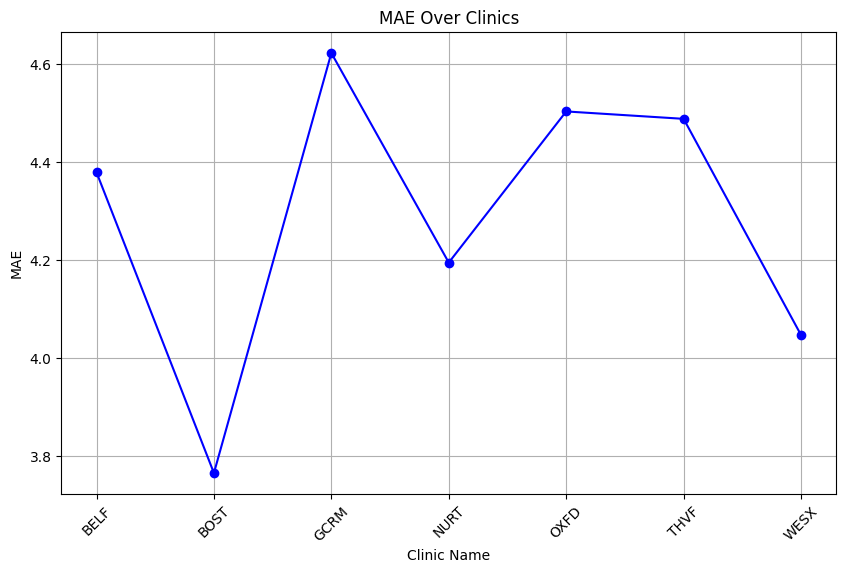

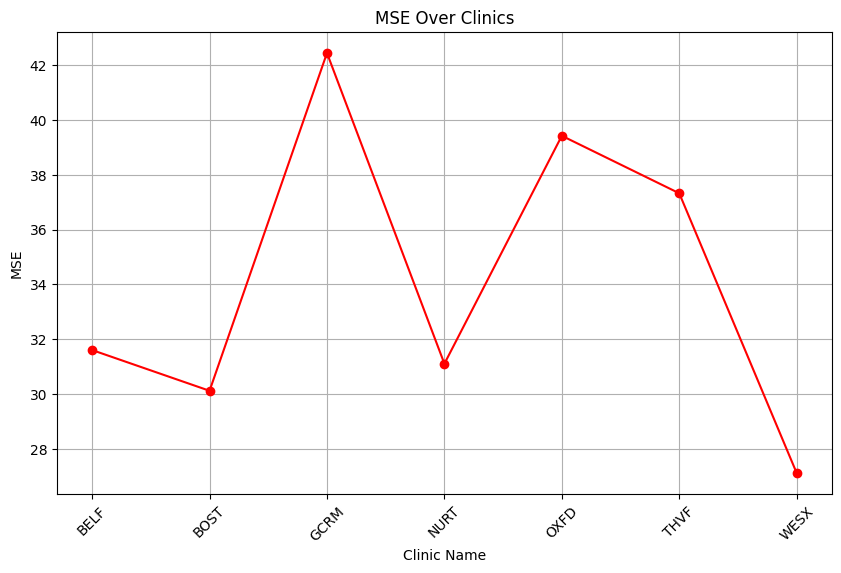

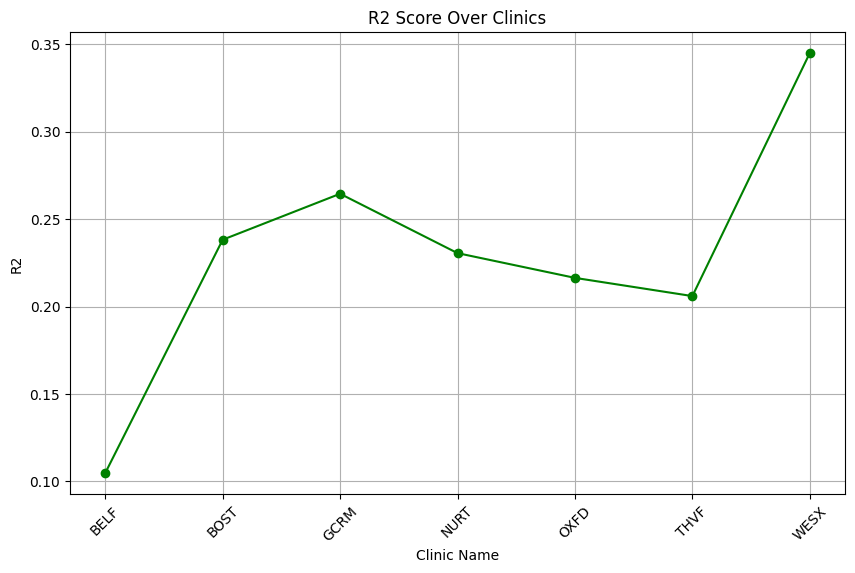

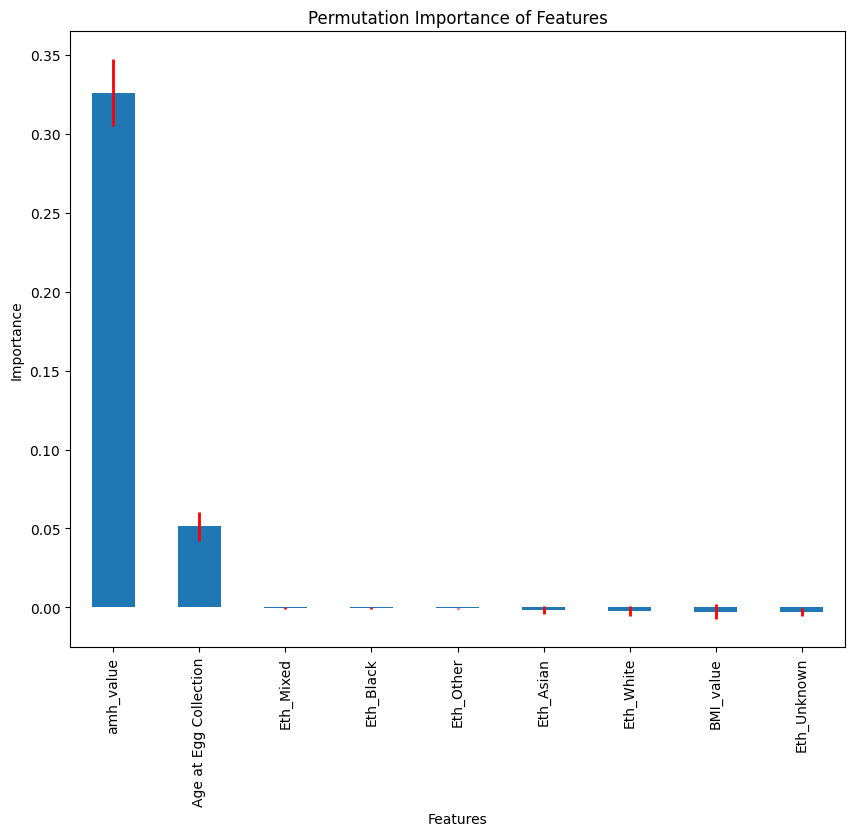

The best K value is 124 with a minimum average MAE of 3.7649
Average MAE overall: 4.285135647362876


In [56]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.inspection import permutation_importance
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
import matplotlib.pyplot as plt

X = filtered_df_eggs[['Age at Egg Collection', 'BMI_value', 'amh_value', 'Eth_Asian', 'Eth_Black', 'Eth_Mixed', 'Eth_Other', 'Eth_Unknown', 'Eth_White']]
y = filtered_df_eggs['No. Mature Eggs']
by_clinic = filtered_df_eggs['Clinic']


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

param_space = {
    'knn__n_neighbors': Integer(1, 1000),
    'knn__weights': Categorical(['uniform', 'distance']),
    'knn__metric': Categorical(['euclidean', 'manhattan', 'chebyshev', 'minkowski'])
}

outer_cv = LeaveOneGroupOut()
k_values = []
mae_values = []
outer_scores = []
clinic_names = []  # List to store clinic names corresponding to each fold
df_perm_importance = pd.DataFrame(index=X.columns)

for fold_index, (train_index, test_index) in enumerate(outer_cv.split(X, y, by_clinic)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clinic_name = by_clinic.iloc[test_index].unique()[0]
    clinic_names.append(clinic_name)  # Append clinic name for plotting

    inner_cv = LeaveOneGroupOut()
    bayes_search = BayesSearchCV(
        estimator=pipe,
        search_spaces=param_space,
        scoring='neg_mean_absolute_error',
        cv=inner_cv,
        n_jobs=-1,
        refit=True,
        optimizer_kwargs={'acq_func': 'EI'},
        verbose=1,
        random_state=42,
        n_iter=40,
        return_train_score=True
    )
    bayes_search.fit(X_train, y_train, groups=by_clinic.iloc[train_index])

    best_params = bayes_search.best_params_
    best_model = bayes_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    k_values.append(best_params['knn__n_neighbors'])
    mae_values.append(mae)
    outer_scores.append([mae, r2, mse])

    perm_result = permutation_importance(best_model, X_test, y_test, n_repeats=5)
    for i, col in enumerate(X.columns):
        df_perm_importance.at[col, f'mean_importance_{fold_index}'] = perm_result.importances_mean[i]
        df_perm_importance.at[col, f'std_importance_{fold_index}'] = perm_result.importances_std[i]

# Analysis of K values
k_vs_mae = pd.DataFrame({'K': k_values, 'MAE': mae_values})
mean_mae_by_k = k_vs_mae.groupby('K').MAE.mean()

# Plotting MAE, MSE, R2 over Clinics
outer_scores_df = pd.DataFrame(outer_scores, columns=['MAE', 'R2', 'MSE'])

plt.figure(figsize=(10, 6))
plt.plot(clinic_names, outer_scores_df['MAE'], marker='o', linestyle='-', color='blue')
plt.title('MAE Over Clinics')
plt.xticks(rotation=45)  # Rotate clinic names for better visibility if needed
plt.xlabel('Clinic Name')
plt.ylabel('MAE')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(clinic_names, outer_scores_df['MSE'], marker='o', linestyle='-', color='red')
plt.title('MSE Over Clinics')
plt.xticks(rotation=45)
plt.xlabel('Clinic Name')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(clinic_names, outer_scores_df['R2'], marker='o', linestyle='-', color='green')
plt.title('R2 Score Over Clinics')
plt.xticks(rotation=45)
plt.xlabel('Clinic Name')
plt.ylabel('R2')
plt.grid(True)
plt.show()

# Plotting permutation importances
mean_importances = df_perm_importance.filter(like='mean_importance').mean(axis=1)
std_importances = df_perm_importance.filter(like='std_importance').mean(axis=1)
plt.figure(figsize=(10, 8))
(mean_importances).sort_values(ascending=False).plot(kind='bar', yerr=std_importances, error_kw=dict(elinewidth=2, ecolor='red'))
plt.title('Permutation Importance of Features')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

# Print optimal K and statistics
optimal_k = mean_mae_by_k.idxmin()
print(f"The best K value is {optimal_k} with a minimum average MAE of {mean_mae_by_k.min():.4f}")
print("Average MAE overall:", np.mean(mae_values))

In [65]:
outer_scores_df['R2']

0    0.104787
1    0.238216
2    0.264502
3    0.230549
4    0.216399
5    0.205984
6    0.344984
Name: R2, dtype: float64

In [102]:
import pandas as pd
from sklearn.model_selection import LeaveOneGroupOut

# Assuming df_encoded is already defined
X = df_encoded[['Age at Egg Collection', 'BMI_value', 'amh_value', 
                'Eth_Asian', 'Eth_Black', 'Eth_Mixed', 'Eth_Other', 'Eth_Unknown', 'Eth_White']]
y = df_encoded['os_init_dose']
by_clinic = df_encoded['Clinic']

# Initialize LeaveOneGroupOut cross-validator
logo = LeaveOneGroupOut()

# List to store clinics in each fold
fold_clinics = []

# Iterate through each fold and store the clinic names
for train_index, test_index in logo.split(X, y, groups=by_clinic):
    clinic_test = by_clinic.iloc[test_index]
    fold_clinics.append(list(clinic_test.unique()))

# Print the clinics corresponding to each fold
print("\nClinics in each fold:")
for i, clinics in enumerate(fold_clinics):
    print(f"Fold {i}: {clinics}")



Clinics in each fold:
Fold 0: ['BELF']
Fold 1: ['BOST']
Fold 2: ['GCRM']
Fold 3: ['NURT']
Fold 4: ['OXFD']
Fold 5: ['SIMP']
Fold 6: ['THVF']
Fold 7: ['WESX']


Files saved to: KNN_Model_Results


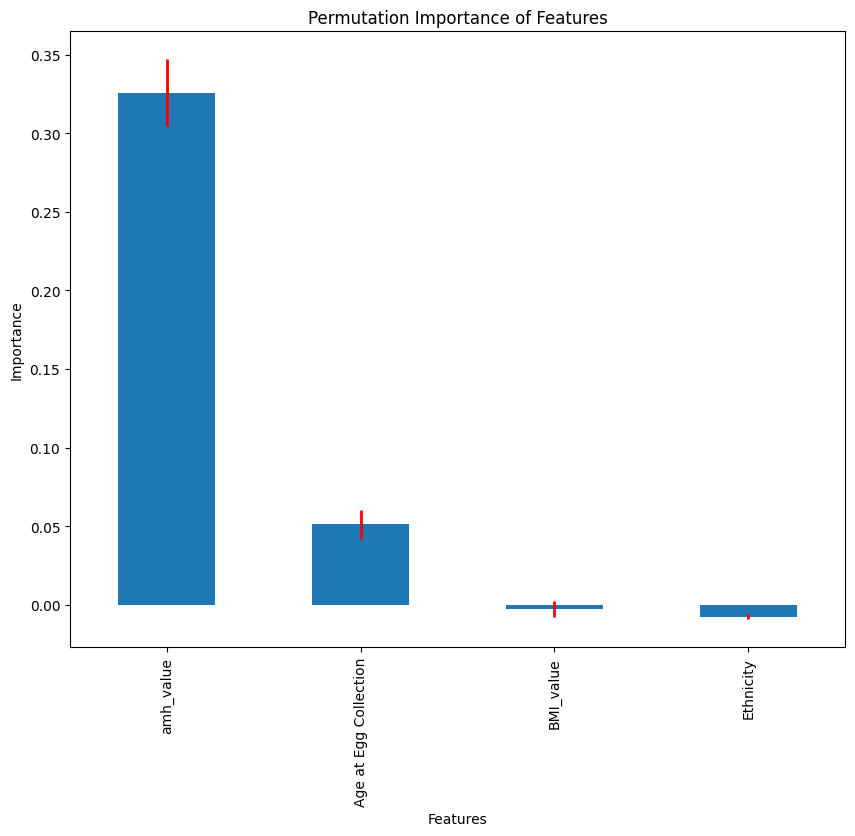

The best K value is 124 with a minimum average MAE of 3.7649
Average MAE overall: 4.285135647362876


In [66]:
import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating folder and saving files
folder_name = "KNN_Model_Results"
os.makedirs(folder_name, exist_ok=True)
current_date = datetime.now().strftime("%d-%m-%Y %H-%M")

# Save Permutation Importances
file_name = f"{current_date}_Permutation_Importances.csv"
csv_file_path = os.path.join(folder_name, file_name)
df_perm_importance.to_csv(csv_file_path)

# Save K values and MAE
df_k_vs_mae = pd.DataFrame({'K': k_values, 'MAE': mae_values})
file_name = f"{current_date}_K_vs_MAE.csv"
csv_file_path = os.path.join(folder_name, file_name)
df_k_vs_mae.to_csv(csv_file_path)

# Save the outer scores (MAE, R2, MSE)
df_outer_scores = pd.DataFrame(outer_scores, columns=['MAE', 'R2', 'MSE'])
file_name = f"{current_date}_Outer_Scores.csv"
csv_file_path = os.path.join(folder_name, file_name)
df_outer_scores.to_csv(csv_file_path)

print("Files saved to:", folder_name)

# Grouping and plotting permutation importances
plt.figure(figsize=(10, 8))
mean_importances = df_perm_importance.filter(like='mean_importance').mean(axis=1)
std_importances = df_perm_importance.filter(like='std_importance').mean(axis=1)

# Combine Ethnicity columns
eth_columns = [col for col in mean_importances.index if col.startswith('Eth_')]
eth_mean_importance = mean_importances[eth_columns].sum()
eth_std_importance = std_importances[eth_columns].mean()

# Remove individual Ethnicity columns and add combined column
mean_importances = mean_importances.drop(eth_columns)
std_importances = std_importances.drop(eth_columns)
mean_importances['Ethnicity'] = eth_mean_importance
std_importances['Ethnicity'] = eth_std_importance

# Plotting permutation importances
mean_importances_sorted = mean_importances.sort_values(ascending=False)
std_importances_sorted = std_importances[mean_importances_sorted.index]
mean_importances_sorted.plot(kind='bar', yerr=std_importances_sorted, error_kw=dict(elinewidth=2, ecolor='red'))
plt.title('Permutation Importance of Features')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

# Print optimal K and statistics
optimal_k = mean_mae_by_k.idxmin()
print(f"The best K value is {optimal_k} with a minimum average MAE of {mean_mae_by_k.min():.4f}")
print("Average MAE overall:", np.mean(mae_values))


### Clustering Results for KNN and Calculating Feature Importance for Each Cluster

     K       MAE  Cluster
0  126  4.378459        1
1  124  3.764861        0
2  127  4.621806        1
3  178  4.194279        0
4  117  4.502632        1
5  197  4.487542        0
6  178  4.046370        0
149.57142857142858


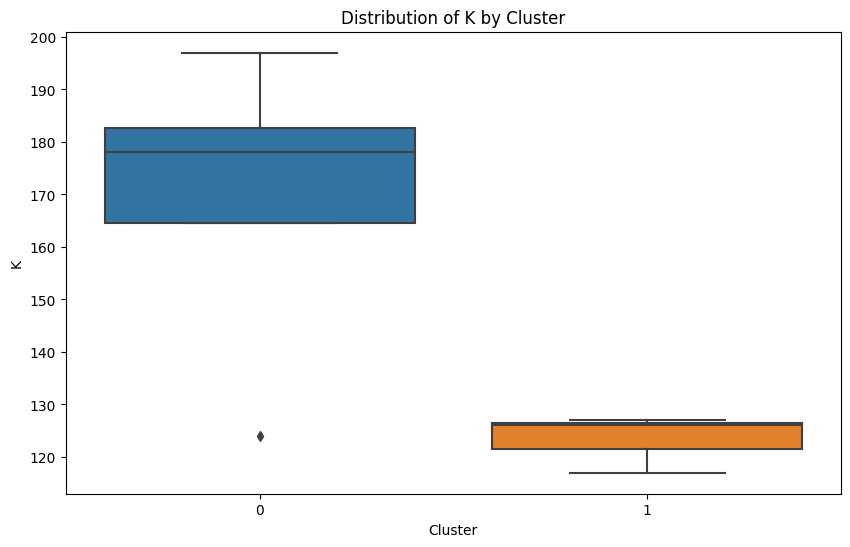

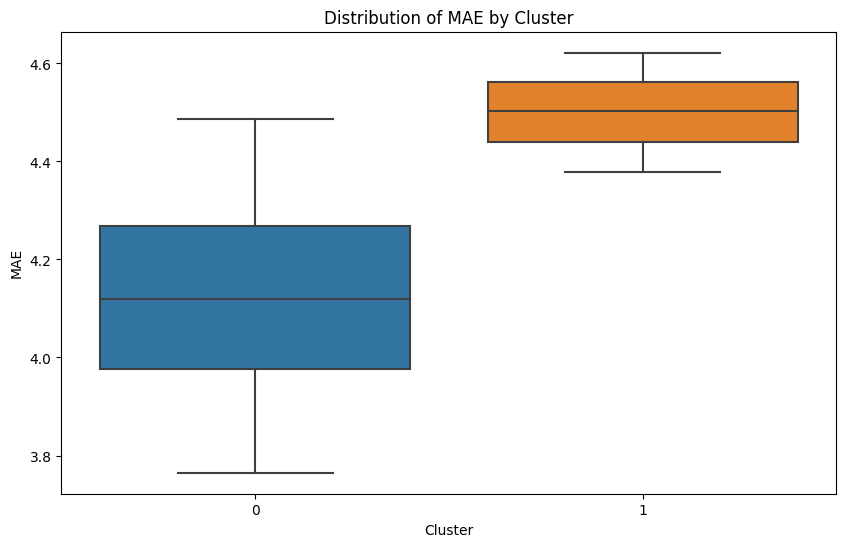

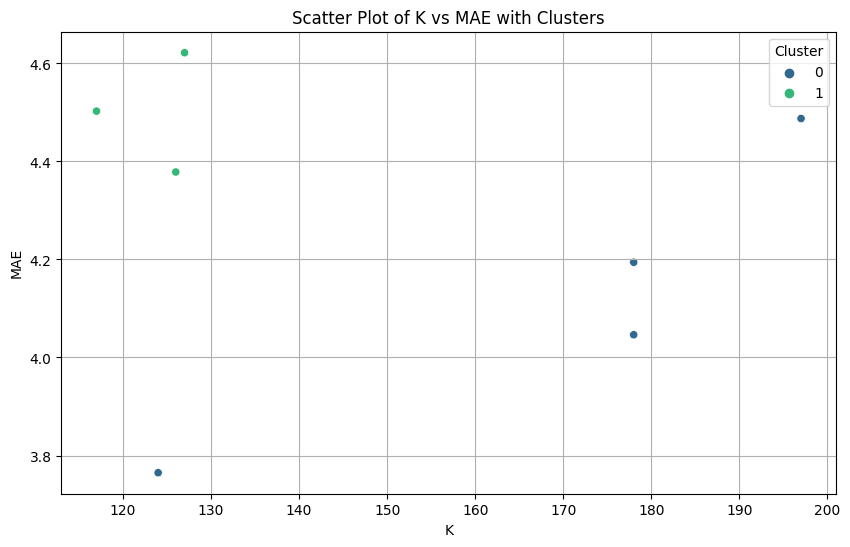

/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/seabo

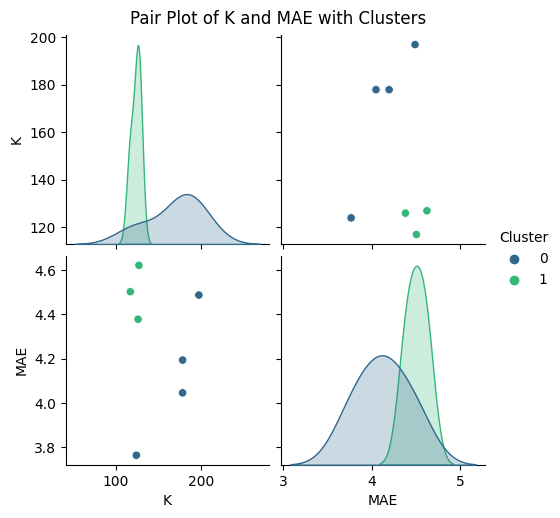

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Ensure 'K' and 'MAE' columns are numeric
k_vs_mae['K'] = pd.to_numeric(k_vs_mae['K'], errors='coerce')
k_vs_mae['MAE'] = pd.to_numeric(k_vs_mae['MAE'], errors='coerce')

# Standardize the features
scaler = StandardScaler()
k_vs_mae_scaled = scaler.fit_transform(k_vs_mae[['K', 'MAE']])

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)  # You can choose a different number of clusters
k_vs_mae['Cluster'] = agg_clustering.fit_predict(k_vs_mae_scaled)

# Save the DataFrame with cluster assignments to a new CSV file
k_vs_mae.to_csv('clinic_clusters_agglomerative.csv', index=False)

# Display the DataFrame with cluster assignments
print(k_vs_mae)
print(np.mean(k_vs_mae['K']))

# Visualize distributions of K and MAE without normalization
for feature in ['K', 'MAE']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=k_vs_mae)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='K', y='MAE', hue='Cluster', palette='viridis', data=k_vs_mae)
plt.title('Scatter Plot of K vs MAE with Clusters')
plt.xlabel('K')
plt.ylabel('MAE')
plt.grid(True)
plt.show()

# Pair plot to visualize the clustering
sns.pairplot(k_vs_mae, hue='Cluster', palette='viridis', vars=['K', 'MAE'])
plt.suptitle('Pair Plot of K and MAE with Clusters', y=1.02)
plt.show()


### Statistical Analysis of Each Clinic

In [249]:
import pandas as pd

# Assuming df_encoded is already defined
features = ['Age at Egg Collection', 'BMI_value', 'amh_value']

# Calculate descriptive statistics
descriptive_stats = df_encoded.groupby('Clinic')[features].describe()
descriptive_stats.to_csv('descriptive_stats_KNN.csv')

In [250]:
import plotly.express as px

# Assuming df_encoded and features are already defined
features = ['Age at Egg Collection', 'BMI_value', 'amh_value']

# Plot box plots for each feature by clinic with different colors
for feature in features:
    fig = px.box(df_encoded, x='Clinic', y=feature, title=f'Distribution of {feature} by Clinic', color='Clinic')
    fig.update_layout(
        xaxis_title='Clinic',
        yaxis_title=feature,
        template='plotly_white',
        title_font=dict(size=24),
        title_x=0.5
    )
    fig.show()


/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/Users/ziyadansari/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [172]:
df_encoded.to_csv('Filtered_AllClinics_Updated_29052024.csv')